In [ ]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.core.pylabtools import figsize
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split
import pickle
from sklearn.model_selection import validation_curve
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv')
df.head() # importing all required libraries

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape # checking the quantity of raws and columns

(768, 9)

In [ ]:
df.info()# checking the data type of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe() # checking for the statistiks of the data frame

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().sum()# counting nulls of the df

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df2=df # copying the original dataset, for not to loose it
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isnull().values.any()# checking for NaN, we find that there are no "NaNs"

False

In [ ]:
print(sum(df.duplicated()))# checking for the duplicated raws, we find no such

0


We have defined that the given dataset is qiute pure, thus we might start analysing it in visualisation

In [ ]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

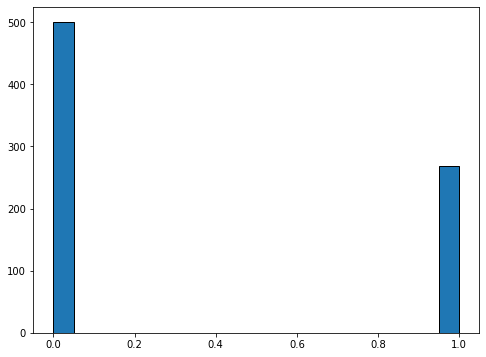

In [ ]:
figsize(8, 6)
plt.hist(df['Outcome'], bins = 20, edgecolor = 'black');# more "0" outcomes(500), and only 268 "1" outcomes, that might be a problem in predicting 

In [ ]:
df2['Outcome'].describe()# checking the statistics for "Outcome" itself, above we cheched the statistics for the entire dataset

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

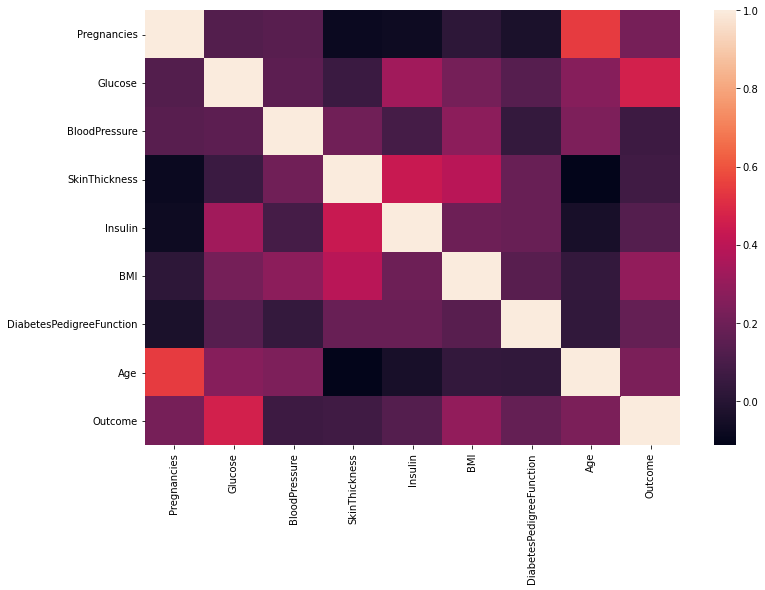

In [ ]:
plt.subplots(figsize=(12,8))
sns.heatmap(df2.corr())# checking the correlation of the entire dataset via heatmap

In [ ]:
df2.corr()# checking the correlation between the columns

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
df2.corrwith(df.Outcome)# checking the correlation of Outcome with the other columns, and conclude that the highest correlayion exists with [Glucose, BMI,
# and age]

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
dtype: float64

In [ ]:
y = df2['Outcome']
x = df2.drop(['Outcome'], axis = 1, inplace=False)# seperaing the dataset into x and y, where y is the only "Outcome" column and the x is the rest of the
#dataset

#inplace = False means the drop column will be less than DF3

In [ ]:
# instantiating the random over sampler 
ros = RandomOverSampler()
# resampling X, y
x_ros, y_ros = ros.fit_resample(x, y)
# new class distribution 
print(Counter(y_ros))

Counter({1: 500, 0: 500})


Now it is time to divide the dataset into training_set and test_set.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.3, random_state=101)
#I get the train and test set from balanced x_ros and y_ros

# **1. Predicting tha data with Linear Regresson**

In [ ]:
from sklearn.linear_model import LinearRegression # import Linear regression to analyse and modeling

In [ ]:
print(X_train.shape, X_test.shape)# looking at the size of the train and test set, train set consists of 700 raws and 8 columns, meanwhile 
# test set comprises 300 raws and 8 columns

(700, 8) (300, 8)


In [ ]:
lm = LinearRegression()# saving Linear Regression operator as "lm"

In [ ]:
lm.fit(X_train,y_train)# training my model

LinearRegression()

In [ ]:
predictions= lm.predict(X_test)
predictions[:5:] # getting ready predicted values

array([0.9004876 , 0.62253835, 0.19150864, 0.44069117, 0.2387208 ])

In [ ]:
lm.intercept_ #determining the intercept, and it is negative

-0.8414381014119138

In [ ]:
lm.coef_# defining the coefficient for every parameter

array([ 2.23154056e-02,  6.07172774e-03, -2.73601612e-03, -9.48279591e-04,
       -1.19040309e-04,  1.60043113e-02,  1.42578841e-01,  3.45450844e-03])

In [ ]:
pred1 = lm.predict(X_test)#finally I predicted via linear regression

In [ ]:
pred1[::6]

array([ 0.9004876 ,  0.61417234,  0.21647581,  0.09524663,  0.39784463,
        0.74612661,  0.2088712 ,  0.77226248,  0.2718392 ,  0.76420314,
        0.01891608,  0.39016253,  0.45862846,  0.76075431,  0.827565  ,
        0.63847773,  0.2301195 ,  0.77927523,  0.79401799,  0.93125245,
        0.29171554,  0.41969419,  0.55361288,  0.38744626,  0.96171282,
        0.92184574, -0.08874868,  0.41430325,  0.8432506 ,  0.45038514,
        0.70318506,  0.82266772,  0.79423838,  1.04979921,  0.90831421,
        0.05301531,  0.5991551 ,  0.10278649,  0.4610897 ,  1.35871505,
        0.51093128,  0.64550104,  0.74029363,  0.51616051,  0.74334313,
        0.35732427,  0.5247691 ,  0.55871206,  0.39026672,  1.10177692])

In [ ]:
print("Mean squared error: %.2f" % np.mean((pred1 - y_test)**2))#defining the mean squared error

Mean squared error: 0.17


In [ ]:
print('Variance score: %.2f' % lm.score(X_test, y_test))#variance score estimation

Variance score: 0.30


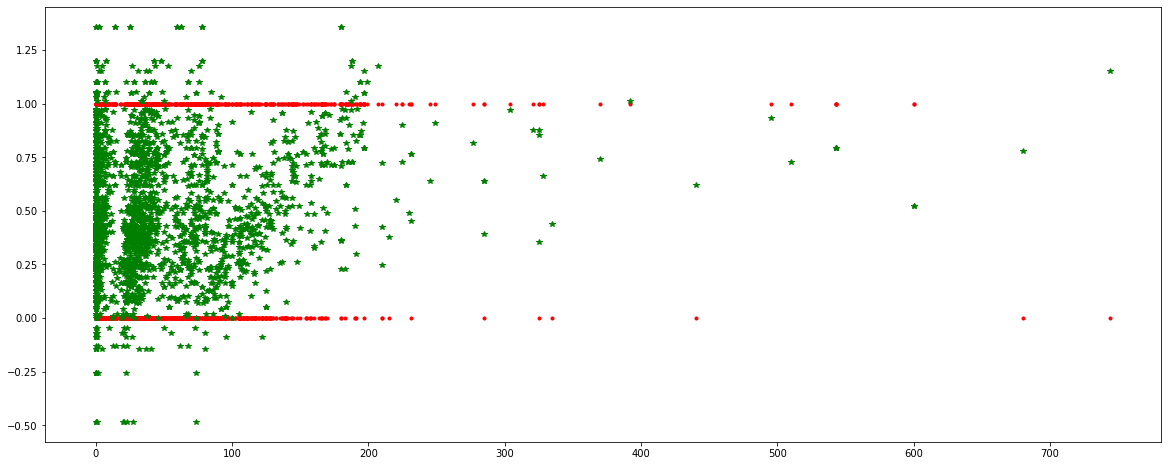

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(X_test,y_test,'r.')
plt.plot(X_test,pred1,'g*')
plt.show()#comparing predicted data with actual data

**2.Predicting with GradientBoostingRegressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_predg = gb.predict(X_test)
mean_absolute_error(y_predg, y_test)#importing the convenient library traing and determining the mean absolute error

0.29884692048177885

In [ ]:
print('Variance score: %.2f' % gb.score(X_test, y_test))#

Variance score: 0.41


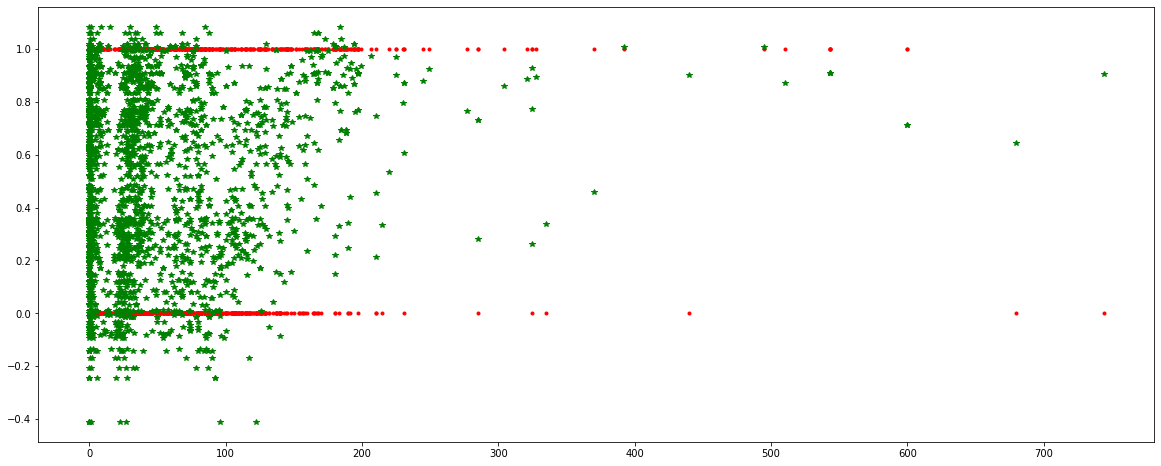

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(X_test,y_test,'r.')
plt.plot(X_test,y_predg,'g*')
plt.show()


**3.Predicting with AdaBoostRegressor**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor()
ab.fit(X_train, y_train)
y_preda = ab.predict(X_test)
mean_absolute_error(y_preda, y_test)# testing my data with adaboostregresor and defining error 

0.36354144834543034

In [ ]:
print('Variance score: %.2f' % ab.score(X_test, y_test))

Variance score: 0.31


In [ ]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test,y_preda)

0.30602913302931944

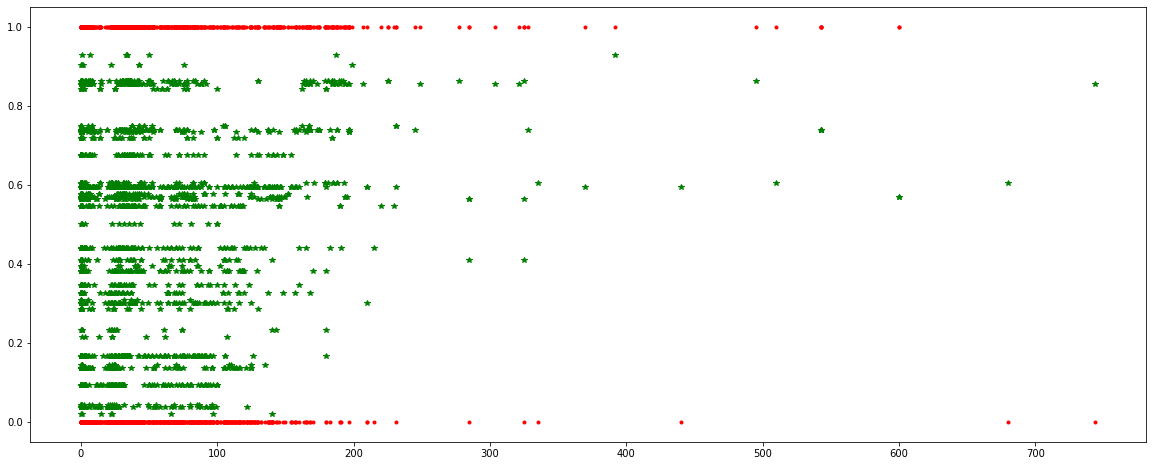

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(X_test,y_test,'r.')
plt.plot(X_test,y_preda,'g*')
plt.show()

**4.Predicting with ExtraTreesRegressor**

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
ext = ExtraTreesRegressor()
ext.fit(X_train, y_train)
y_predex = ext.predict(X_test)
mean_absolute_error(y_predex, y_test)# traing and valueing my model with Extra Tree Regressor

0.21436666666666668

In [ ]:
print('Variance score: %.2f' % ext.score(X_test, y_test))#defining the variance, it is the highest for now

Variance score: 0.57


In [ ]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test,y_predex)

0.5828939086745809

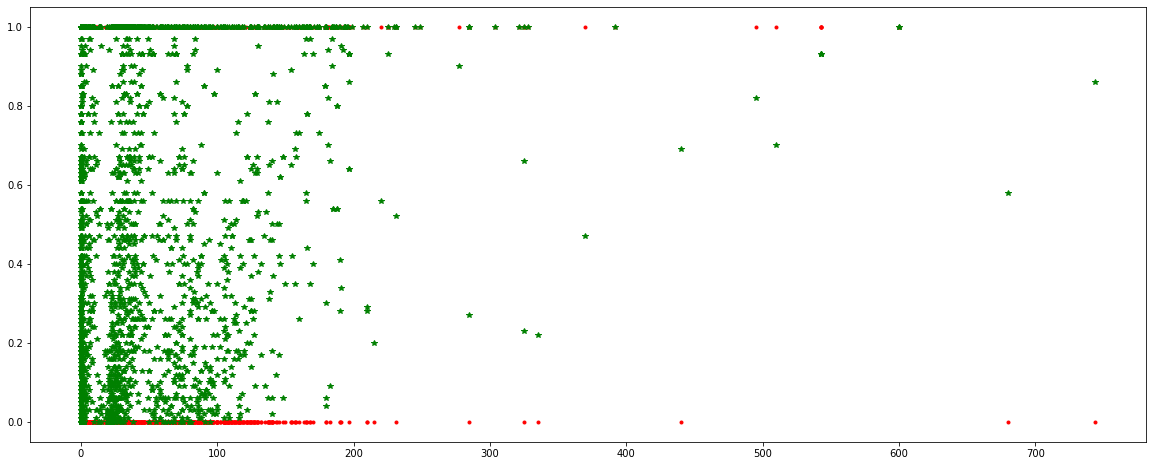

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(X_test,y_test,'r.')
plt.plot(X_test,y_predex,'g*')
plt.show()

**5.Predicting with DecisionTreeRegressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_predt = dt.predict(X_test)
mean_absolute_error(y_predt, y_test) #predicting with Decision Tree, traing it and evaluating it, pretty small error

0.18666666666666668

In [ ]:
print('Variance score: %.2f' % dt.score(X_test, y_test))# variance score is also small

Variance score: 0.25


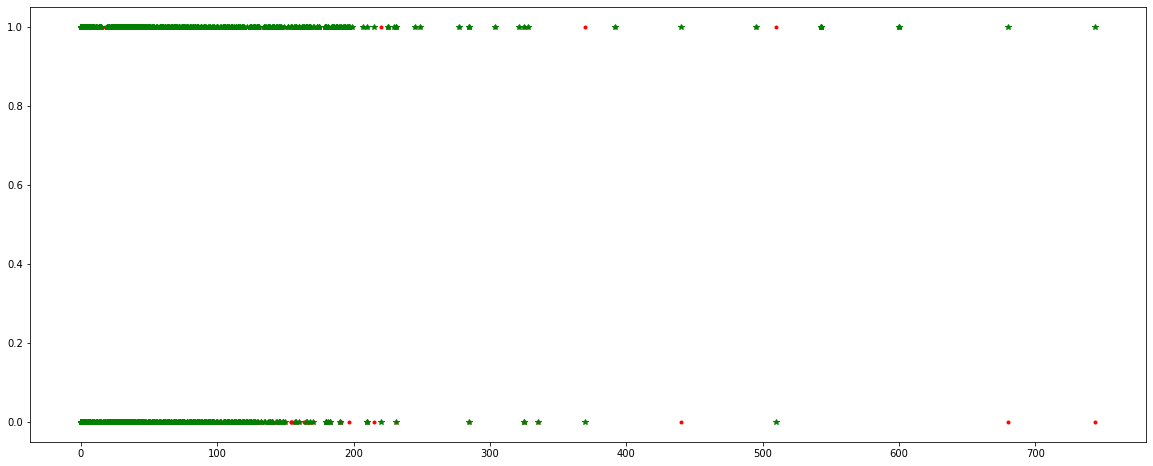

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(X_test,y_test,'r.')
plt.plot(X_test,y_predt,'g*')
plt.show()

In [ ]:
max(y_test)# nimaga buni chiqardik?

1

In [ ]:
print(y_predt[:10])
print(y_test[:10].to_numpy())

[1. 1. 1. 1. 0. 0. 0. 1. 1. 1.]
[1 1 1 1 0 0 0 1 1 1]


6.**Predicting with SVR**

In [ ]:
from sklearn.svm import SVR
sv = SVR()
sv.fit(X_train, y_train)
y_predsv = sv.predict(X_test)
mean_absolute_error(y_predsv, y_test)# traing and predicting with SVR

0.3184411646509897

In [ ]:
print('Variance score: %.2f' % sv.score(X_test, y_test))# defining variance score

Variance score: 0.32


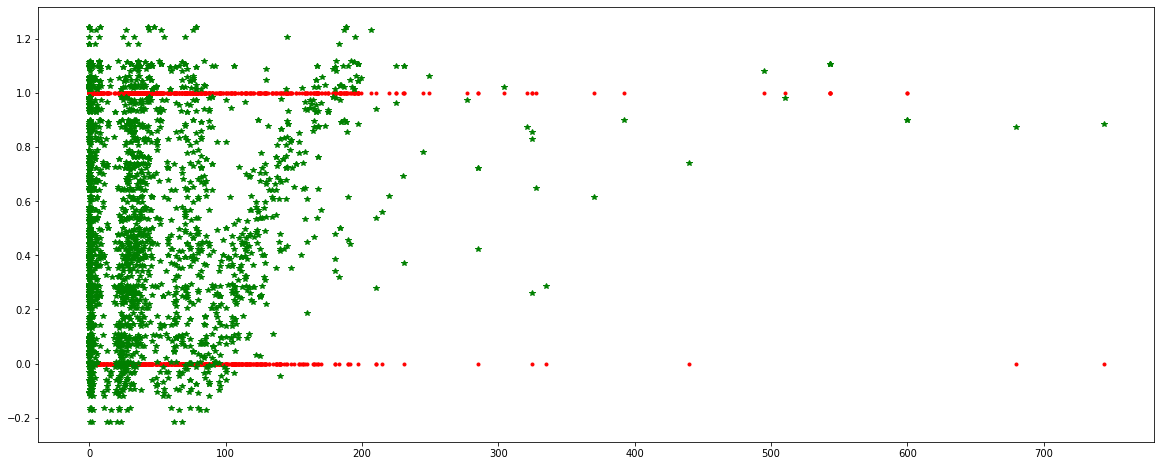

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(X_test,y_test,'r.')
plt.plot(X_test,y_predsv,'g*')
plt.show()

7.**Predicting with RandomForestRegressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_predr = rf.predict(X_test)
print(mean_absolute_error(y_predr, y_test))# traing applying and predicting the data, and the estimation of mean absolute error

0.24890000000000007


In [ ]:
print('Variance score: %.2f' % rf.score(X_test, y_test)) #variance score definition

Variance score: 0.49


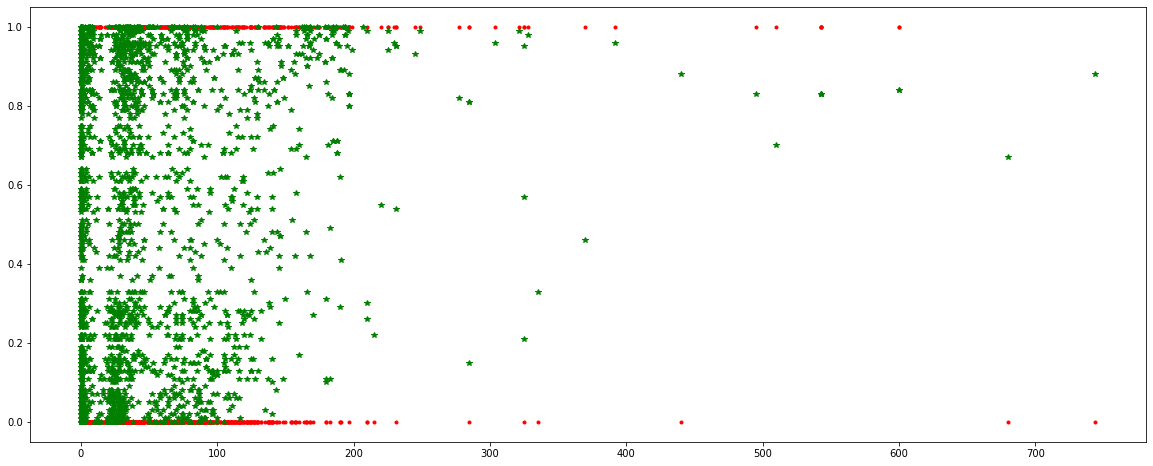

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(X_test,y_test,'r.')
plt.plot(X_test,y_predr,'g*')
plt.show()

**8.Predicting with KNeighborsRegressor**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_predknn = knn.predict(X_test)
mean_absolute_error(y_predknn, y_test)#traing, predicting and estimatin the error 

0.32666666666666666

In [ ]:
print('Variance score: %.2f' % knn.score(X_test, y_test))#calculating the variance score

Variance score: 0.20


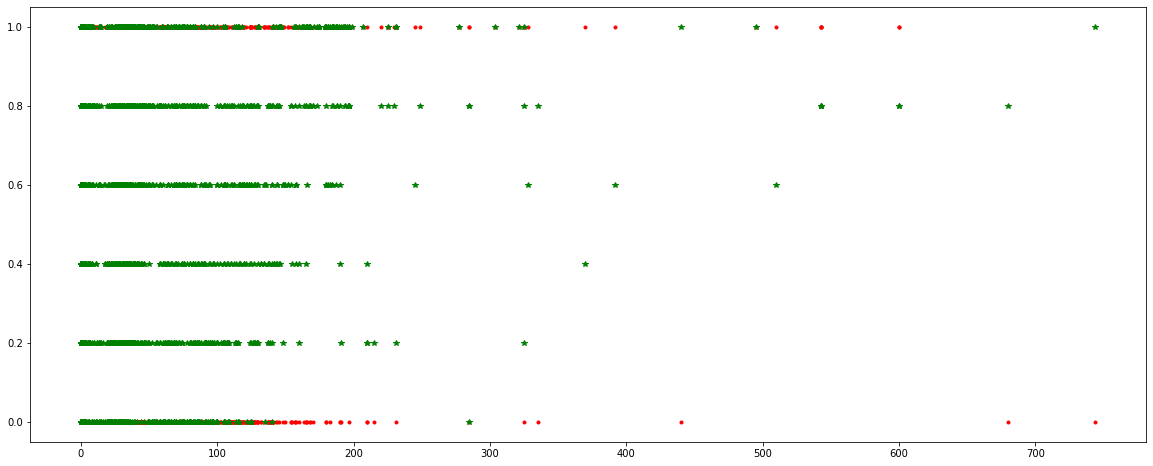

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(X_test,y_test,'r.')
plt.plot(X_test,y_predknn,'g*')
plt.show()